<a href="https://colab.research.google.com/github/Pdaret/Steel-Industry-Energy-Consumption/blob/main/Steel_Industry_Energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Steel Industry Energy Consumption](https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption)**
### *<font color='blue'>Energy Usage prediction</font>

 in this project we want to train a model to predict the <font color='green'>Energy Usage</font> of Steel Industry Based on its Dataset.

# Data Preparation

outlier

In [56]:
import pandas as pd
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn import metrics
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import math 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/Steel_industry_data.csv')
# df = pd.read_csv('Steel_industry_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df = df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh'
                ,'CO2(tCO2)':'CO2'})

In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [ ]:
df.describe()[['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh','Leading_Current_Reactive_Power_kVarh']]

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh
count,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949
std,33.444380,16.306000,7.424463
min,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000
50%,4.570000,5.000000,0.000000
75%,51.237500,22.640000,2.090000
max,157.180000,96.910000,27.760000


In [ ]:
fig1 = px.histogram(df, x='Usage_kWh')
#drawing histogram for Usage
fig1.show()

In [ ]:
fig2 = px.box(df, y='Usage_kWh')
#drawing boxplot for Usage
fig2.show()

In [ ]:
Q1=df.Usage_kWh.quantile(0.25)
Q3=df.Usage_kWh.quantile(0.75)

In [ ]:
IQR=Q3-Q1
IQR

48.037499999999994

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-68.85624999999999, 123.29374999999999)

In [ ]:
#outliers
df[(df.Usage_kWh<lower_limit)|(df.Usage_kWh>upper_limit)]

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
140,02/01/2018 11:15,128.52,70.85,0.0,0.00,87.57,100.0,40500,Weekday,Tuesday,Maximum_Load
141,02/01/2018 11:30,144.47,78.48,0.0,0.00,87.87,100.0,41400,Weekday,Tuesday,Maximum_Load
143,02/01/2018 12:00,123.30,66.06,0.0,0.00,88.15,100.0,43200,Weekday,Tuesday,Maximum_Load
150,02/01/2018 13:45,124.45,49.79,0.0,0.00,92.85,100.0,49500,Weekday,Tuesday,Medium_Load
153,02/01/2018 14:30,129.10,53.50,0.0,0.00,92.38,100.0,52200,Weekday,Tuesday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...,...
33851,19/12/2018 15:00,145.22,70.67,0.0,0.07,89.92,100.0,54000,Weekday,Wednesday,Medium_Load
33853,19/12/2018 15:30,130.46,60.23,0.0,0.06,90.79,100.0,55800,Weekday,Wednesday,Medium_Load
33855,19/12/2018 16:00,125.21,58.43,0.0,0.06,90.62,100.0,57600,Weekday,Wednesday,Medium_Load
33856,19/12/2018 16:15,133.56,64.40,0.0,0.06,90.08,100.0,58500,Weekday,Wednesday,Medium_Load


In [ ]:
fig3 = px.histogram(df, x='Lagging_Current_Reactive_Power_kVarh')
fig3.show()
#drawing histogram for Lagging_Current_Reactive.Power_kVarh

In [ ]:
fig4 = px.box(df, y='Lagging_Current_Reactive_Power_kVarh')
fig4.show()
#drawing boxplot for Lagging_Current_Reactive.Power_kVarh

In [ ]:
Q1=df.Lagging_Current_Reactive_Power_kVarh.quantile(0.25)
Q3=df.Lagging_Current_Reactive_Power_kVarh.quantile(0.75)

In [ ]:
IQR=Q3-Q1
IQR

20.34

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [ ]:
df[(df.Lagging_Current_Reactive_Power_kVarh<lower_limit)|(df.Lagging_Current_Reactive_Power_kVarh>upper_limit)]
#outliers

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
140,02/01/2018 11:15,128.52,70.85,0.0,0.00,87.57,100.0,40500,Weekday,Tuesday,Maximum_Load
141,02/01/2018 11:30,144.47,78.48,0.0,0.00,87.87,100.0,41400,Weekday,Tuesday,Maximum_Load
142,02/01/2018 11:45,90.86,54.29,0.0,0.00,85.84,100.0,42300,Weekday,Tuesday,Maximum_Load
143,02/01/2018 12:00,123.30,66.06,0.0,0.00,88.15,100.0,43200,Weekday,Tuesday,Maximum_Load
152,02/01/2018 14:15,123.12,55.26,0.0,0.00,91.23,100.0,51300,Weekday,Tuesday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...,...
33853,19/12/2018 15:30,130.46,60.23,0.0,0.06,90.79,100.0,55800,Weekday,Wednesday,Medium_Load
33855,19/12/2018 16:00,125.21,58.43,0.0,0.06,90.62,100.0,57600,Weekday,Wednesday,Medium_Load
33856,19/12/2018 16:15,133.56,64.40,0.0,0.06,90.08,100.0,58500,Weekday,Wednesday,Medium_Load
33921,20/12/2018 08:30,79.85,60.98,0.0,0.04,79.48,100.0,30600,Weekday,Thursday,Light_Load


In [ ]:
fig5 = px.histogram(df, x='Leading_Current_Reactive_Power_kVarh')
fig5.show()
#drawing histogram for Leading_Current_Reactive_Power_kVarh

In [ ]:
fig6 = px.box(df, y='Leading_Current_Reactive_Power_kVarh')
fig6.show()
#drawing boxplot for Leading_Current_Reactive_Power_kVarh

In [ ]:
Q1=df.Leading_Current_Reactive_Power_kVarh.quantile(0.25)
Q3=df.Leading_Current_Reactive_Power_kVarh.quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [ ]:
df[(df.Leading_Current_Reactive_Power_kVarh<lower_limit)|(df.Leading_Current_Reactive_Power_kVarh>upper_limit)]
#outliers

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35,01/01/2018 09:00,3.89,0.0,15.66,0.0,100.0,24.11,32400,Weekday,Monday,Light_Load
36,01/01/2018 09:15,3.60,0.0,16.96,0.0,100.0,20.76,33300,Weekday,Monday,Light_Load
37,01/01/2018 09:30,4.03,0.0,21.28,0.0,100.0,18.61,34200,Weekday,Monday,Light_Load
38,01/01/2018 09:45,3.92,0.0,19.22,0.0,100.0,19.98,35100,Weekday,Monday,Light_Load
39,01/01/2018 10:00,3.64,0.0,16.88,0.0,100.0,21.08,36000,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35027,31/12/2018 21:00,3.42,0.0,13.36,0.0,100.0,24.80,75600,Weekday,Monday,Light_Load
35028,31/12/2018 21:15,3.42,0.0,13.39,0.0,100.0,24.75,76500,Weekday,Monday,Light_Load
35029,31/12/2018 21:30,3.49,0.0,13.36,0.0,100.0,25.27,77400,Weekday,Monday,Light_Load
35030,31/12/2018 21:45,3.42,0.0,13.36,0.0,100.0,24.80,78300,Weekday,Monday,Light_Load


 **Standardizing**

In [ ]:
#standardizing
review = pd.DataFrame(df)
review
review['Usage_kWh']=stats.zscore(review['Usage_kWh'])
review['Lagging_Current_Reactive_Power_kVarh']=stats.zscore(review['Lagging_Current_Reactive_Power_kVarh'])
review['Leading_Current_Reactive_Power_kVarh']=stats.zscore(review['Leading_Current_Reactive_Power_kVarh'])
review['CO2']=stats.zscore(review['CO2'])
review['Lagging_Current_Power_Factor']=stats.zscore(review['Lagging_Current_Power_Factor'])
review['Leading_Current_Power_Factor']=stats.zscore(review['Leading_Current_Power_Factor'])
review['NSM']=stats.zscore(review['NSM'])
review
review.to_csv('standared.csv',index=False)
#file after standardalize 

Transforming

In [ ]:
#transforming

le=LabelEncoder()
label=le.fit_transform(df['WeekStatus'])
df.drop("WeekStatus",axis=1,inplace=True)
df["WeekStatus"]=label
df
#transform with label encoder
#weekday->0  weekend->1

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type,WeekStatus
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,Monday,Light_Load,0
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,Monday,Light_Load,0
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,Monday,Light_Load,0
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,Monday,Light_Load,0
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,Monday,Light_Load,0
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,-0.703772,-0.501380,-0.521385,-0.71355,-0.976587,0.513268,1.605843,Monday,Light_Load,0
35036,31/12/2018 23:15,-0.707061,-0.570067,-0.521385,-0.71355,-0.521538,0.513268,1.641929,Monday,Light_Load,0
35037,31/12/2018 23:30,-0.705865,-0.605024,-0.511957,-0.71355,-0.209188,0.512611,1.678015,Monday,Light_Load,0
35038,31/12/2018 23:45,-0.705865,-0.611770,-0.506569,-0.71355,-0.151052,0.511954,1.714102,Monday,Light_Load,0


In [ ]:
one_hot = pd.get_dummies(df['Day_of_week'])
df = df.drop('Day_of_week',axis = 1)
df = df.join(one_hot)
df
#transform with one_hot for day_of_week

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,Light_Load,0,0,1,0,0,0,0,0
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,Light_Load,0,0,1,0,0,0,0,0
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,Light_Load,0,0,1,0,0,0,0,0
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,Light_Load,0,0,1,0,0,0,0,0
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,Light_Load,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,-0.703772,-0.501380,-0.521385,-0.71355,-0.976587,0.513268,1.605843,Light_Load,0,0,1,0,0,0,0,0
35036,31/12/2018 23:15,-0.707061,-0.570067,-0.521385,-0.71355,-0.521538,0.513268,1.641929,Light_Load,0,0,1,0,0,0,0,0
35037,31/12/2018 23:30,-0.705865,-0.605024,-0.511957,-0.71355,-0.209188,0.512611,1.678015,Light_Load,0,0,1,0,0,0,0,0
35038,31/12/2018 23:45,-0.705865,-0.611770,-0.506569,-0.71355,-0.151052,0.511954,1.714102,Light_Load,0,0,1,0,0,0,0,0


In [ ]:
one_hot = pd.get_dummies(df['Load_Type'])
df = df.drop('Load_Type',axis = 1)
df = df.join(one_hot)
df
#transform with one_hot for load_type

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,0,1,0,0,0,0,0,1,0,0
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,0,1,0,0,0,0,0,1,0,0
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,0,1,0,0,0,0,0,1,0,0
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,0,1,0,0,0,0,0,1,0,0
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,-0.703772,-0.501380,-0.521385,-0.71355,-0.976587,0.513268,1.605843,0,0,1,0,0,0,0,0,1,0,0
35036,31/12/2018 23:15,-0.707061,-0.570067,-0.521385,-0.71355,-0.521538,0.513268,1.641929,0,0,1,0,0,0,0,0,1,0,0
35037,31/12/2018 23:30,-0.705865,-0.605024,-0.511957,-0.71355,-0.209188,0.512611,1.678015,0,0,1,0,0,0,0,0,1,0,0
35038,31/12/2018 23:45,-0.705865,-0.611770,-0.506569,-0.71355,-0.151052,0.511954,1.714102,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
review=pd.DataFrame(df)
review
review.to_csv('transformed.csv',index=False)

# Exploratory Data Analysis

In [65]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/standared.csv')
# df = pd.read_csv('standared.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  float64
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(7), 

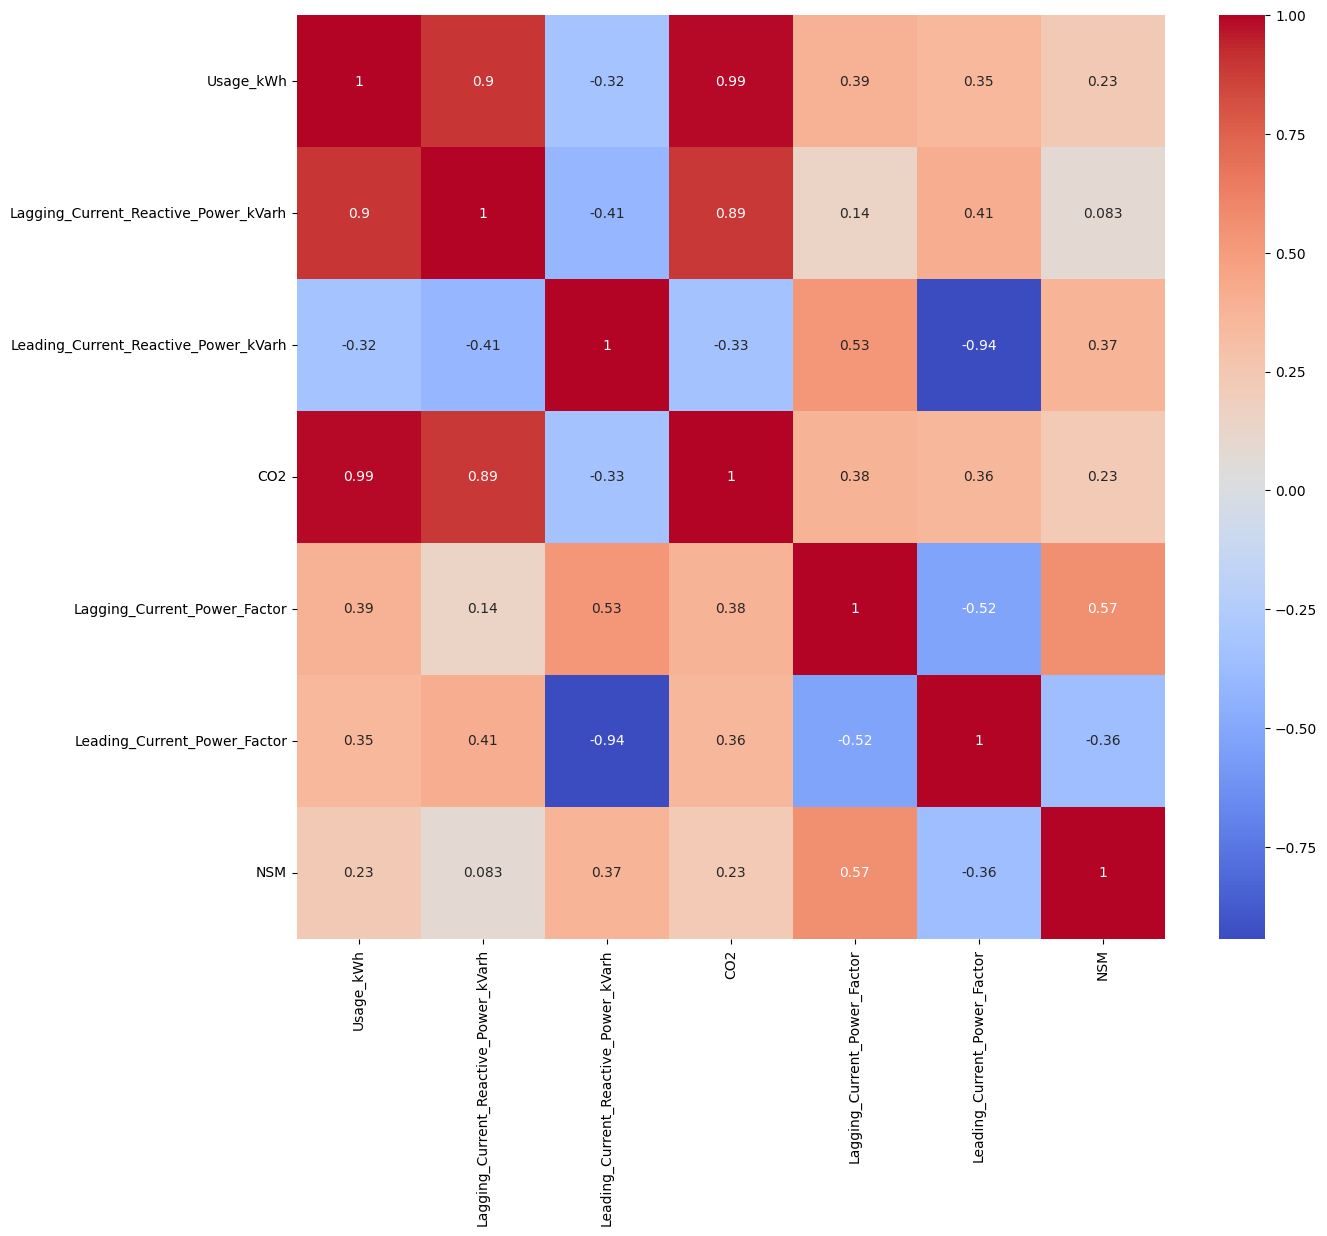

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only = [False])

plt.figure(figsize = (14,12))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
# calculate the most energy consumption based on the time 
most_energy_consumption = pd.pivot_table(df , index = 'date' , values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
01/01/2018 00:00,-0.716630
01/01/2018 00:15,-0.724105
01/01/2018 00:30,-0.699287
01/01/2018 00:45,-0.722012
01/01/2018 01:00,-0.719919
01/01/2018 01:15,-0.704669
01/01/2018 01:30,-0.720816
01/01/2018 01:45,-0.711248
01/01/2018 02:00,-0.711248


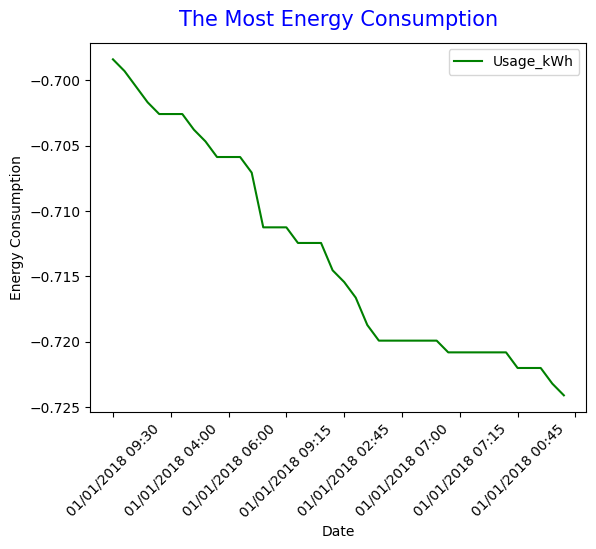

In [ ]:
# visualize the most energy consumption based on the time 
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'green')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

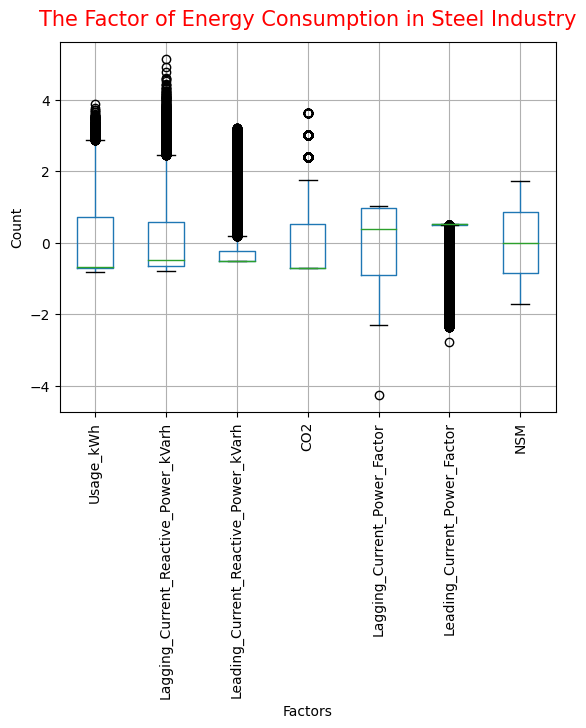

In [ ]:
#analyze the factor of energy consumption
chart = df.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

In [ ]:
#analyze of energy consumption and NSM based on load type, day of week and week status
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                     
Light_Load   Friday      Weekday    -0.783627  -0.479174
             Monday      Weekday    -0.750747  -0.555600
             Saturday    Weekend    -0.455817  -0.607426
             Sunday      Weekend    -0.144560  -0.694171
             Thursday    Weekday    -0.783627  -0.465942
             Tuesday     Weekday    -0.748824  -0.504632
             Wednesday   Weekday    -0.748824  -0.496543
Maximum_Load Friday      Weekday     0.415234   1.006366
             Monday      Weekday     0.415234   1.162883
             Saturday    Weekend     0.390619   0.422879
             Sunday      Weekend     0.404026   0.054084
             Thursday    Weekday     0.415234   1.110393
             Tuesday     Weekday     0.418062   1.155262
             Wednesday   Weekday     0.418062   1.045675
Medium_Load  Friday      Weekday     0.762144   0.443537
             Monday      Weekday     0.762144   0.469752
             Saturday    Weekend     0.780605  -0.294201
             Sunday      Weekend     0.770550  -0.329446
             Thursday    Weekday     0.762144   0.526234
             Tuesday     Weekday     0.760023   0.527268
             Wednesday   Weekday     0.760023   0.390968

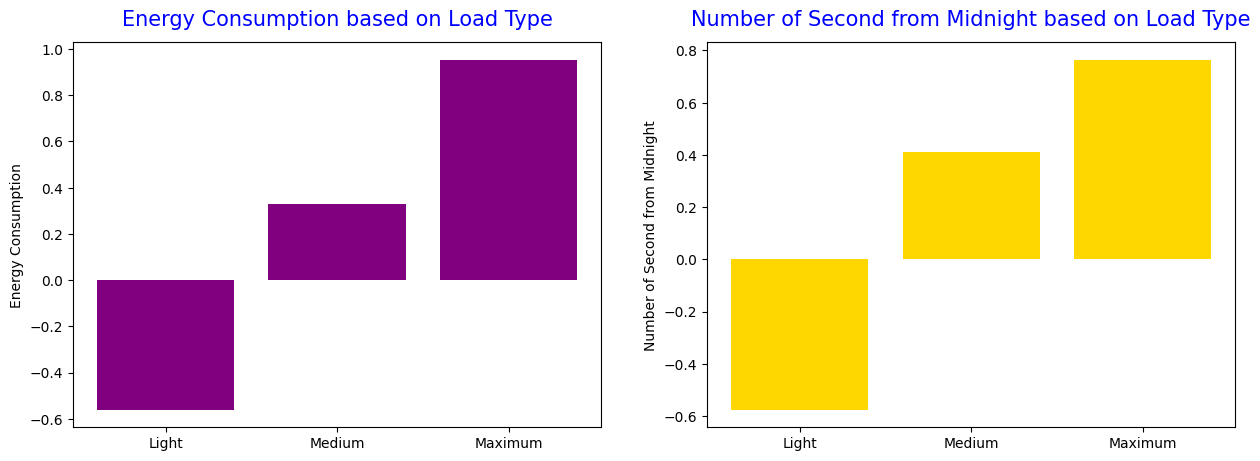

In [ ]:
#visualize energy consumption based on load type
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
usage_chart = df.groupby(['Load_Type'])['Usage_kWh'].mean().sort_values(ascending = True)
labels = ['Light', 'Medium', 'Maximum']
plt.bar(labels, usage_chart.values, color = 'purple')
plt.title('Energy Consumption based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.ylabel('Energy Consumption')

#visualize number of second from midnight based on load type
plt.subplot(1, 2, 2)
nsm_chart = df.groupby(['Load_Type'])['NSM'].mean().sort_values(ascending = True)
plt.bar(labels, nsm_chart.values, color = 'gold')
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.ylabel('Number of Second from Midnight')
plt.show()

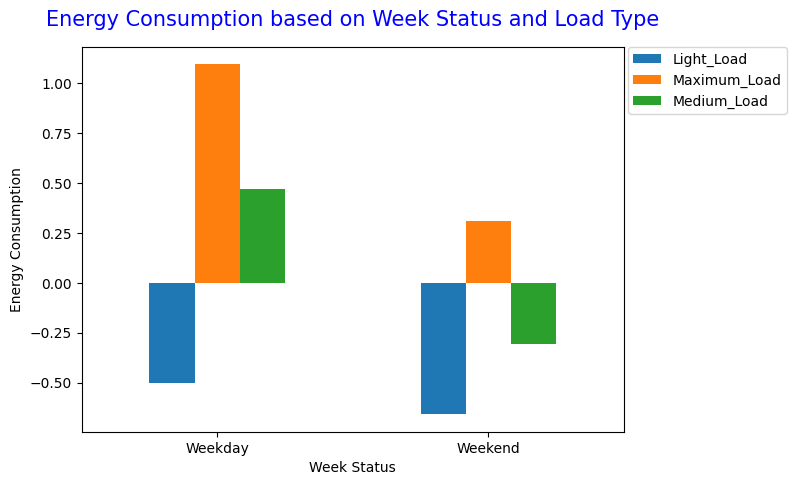

In [ ]:
#visualize energy consumption based on week status and load type
plt.rcParams['figure.figsize'] = (7,5)
chart = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

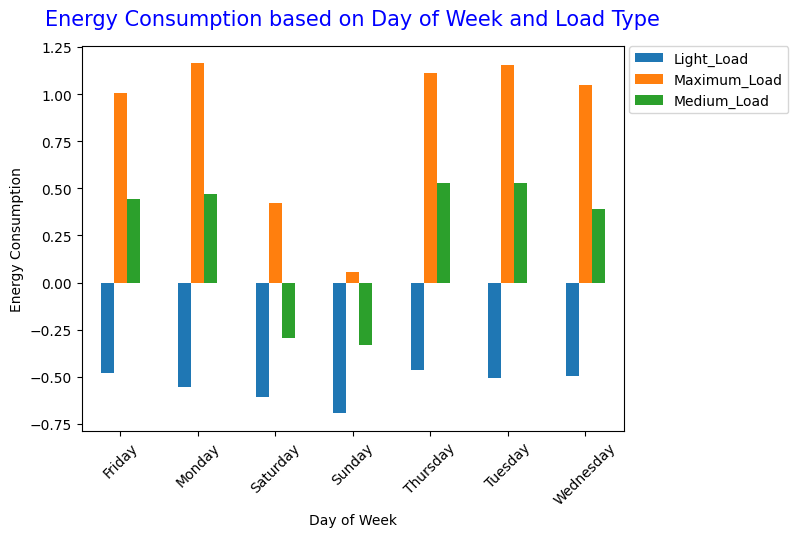

In [ ]:
#visualize energy consumption based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

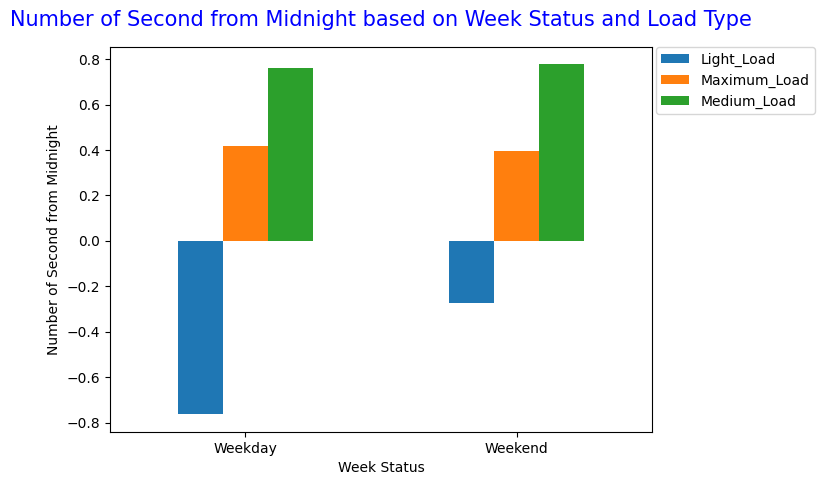

In [ ]:
#visualize number of second from midnight based on week status and load type
chart = df.groupby(['WeekStatus','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

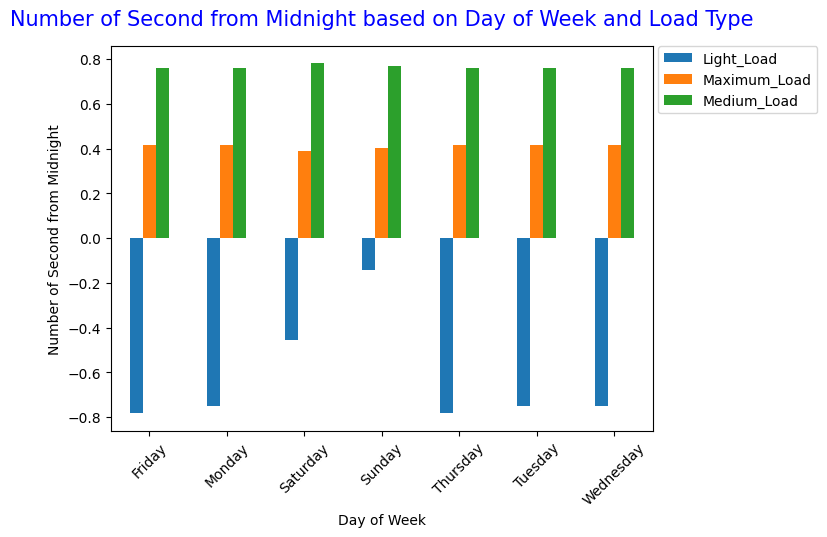

In [ ]:
#visualize number of second from midnight based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Number of Second from Midnight based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

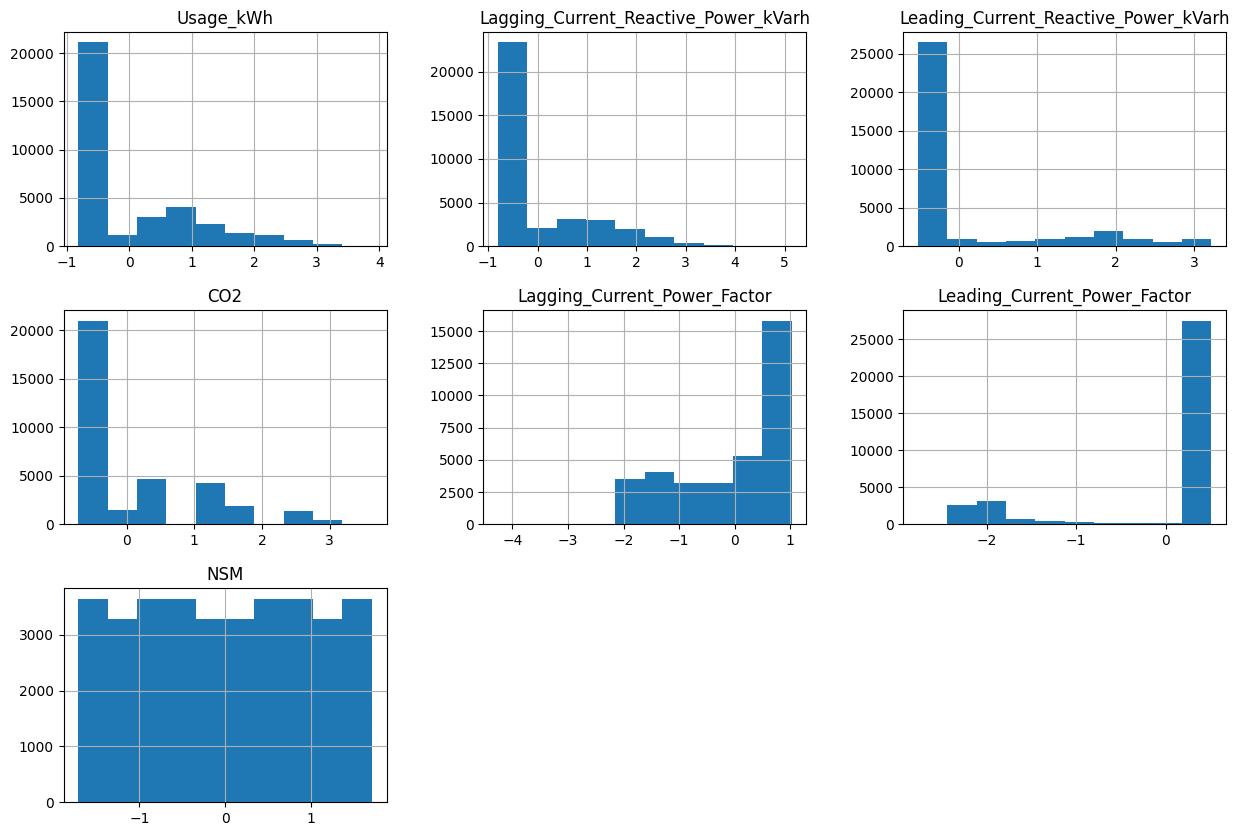

In [ ]:
#distribution of each variable
df.hist(figsize = (15,10))
plt.show()

# Pre-Model 

In [64]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/transformed.csv')
# df = pd.read_csv('transformed.csv')
df.head(5)

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,0,1,0,0,0,0,0,1,0,0
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,0,1,0,0,0,0,0,1,0,0
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,0,1,0,0,0,0,0,1,0,0
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,0,1,0,0,0,0,0,1,0,0
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,0,1,0,0,0,0,0,1,0,0


In [58]:
# indexing data
df = df.set_index('date')

In [59]:
#split data
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24528, 17)
(24528,)
(10512, 17)
(10512,)


# Modeling (Linear Regression)

In [60]:
#Linear Regression Model
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 22.1 ms, sys: 17.5 ms, total: 39.6 ms
Wall time: 89.2 ms


0.9841681626773718

In [61]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 8.74 ms, sys: 6.38 ms, total: 15.1 ms
Wall time: 21.1 ms


0.9841666514804093

In [62]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[-0.72629966  1.2788989   2.90148854 ... -0.75242283 -0.77276214
 -0.70082834]


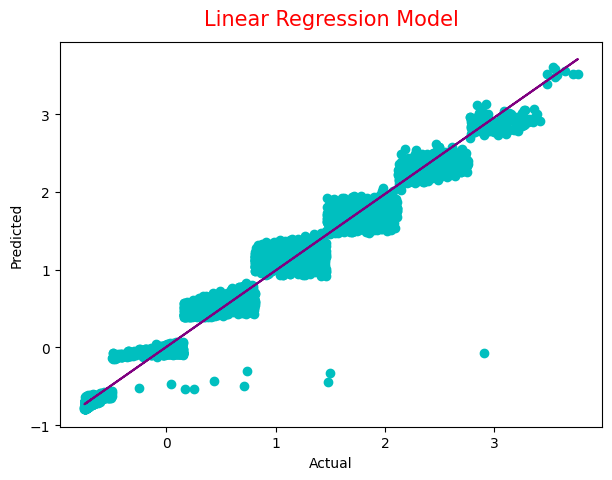

In [63]:
#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'red', pad = 12)
plt.plot(x, y, 'o', color = 'c')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'purple')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Model Evaluation